##Section: More comprehensive and useful examples
A more useful script to read a data file.
The format is a csv file.

In [1]:
# these commands are specific to google drive and are needed to access data files that I added
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv  #to load a module that helps with loading csv files
#how do i find this:  google 'loading csv files python'
#there's often multiple ways to do the same thing.
# Read a site or two, pick one that you think will work.
# try it yourself.
# next time you may use something different.
# don't let perfection get in the way or progress.

#the path is specific to google drive
datafilename = '/content/drive/MyDrive/NDP_Coding_andColabNotebooks/4-1_FakeAnimalData.csv'

# one way of doing this is to just append the data to different lists
ratID = []
Ntriallist = []
Nsuccesslist = []
with open(datafilename, newline='') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    #we can skip the header row
    next(filereader, None)

    #now loop through the rest of the file and print the data
    for row in filereader:
        print(row)
        #join.row connects all of the data together for formatting
        ratID.append(row[0])
        Ntriallist.append(float(row[3])) #If we know these are numerical values, convert them to a float
        Nsuccesslist.append(float(row[4]))
        print(ratID)
        print(Ntriallist)
        print(Nsuccesslist)
        print()




['123', '1/12/23', 'ladderwalk', '10', '8']
['123']
[10.0]
[8.0]

['456', '2/12/23', 'ladderwalk', '11', '3']
['123', '456']
[10.0, 11.0]
[8.0, 3.0]

['789', '3/12/23', 'ladderwalk', '12', '7']
['123', '456', '789']
[10.0, 11.0, 12.0]
[8.0, 3.0, 7.0]



In [ ]:
#Now let's do some calculations from the data
SuccessRate = []
print('Final calculations on list')
for s in range(0,len(ratID)):
  SuccessRate.append(Nsuccesslist[s] / Ntriallist[s] * 100)

print(SuccessRate)
MeanSuccessRate = sum(SuccessRate) / len(SuccessRate)
print('Mean success rate is ',MeanSuccessRate)

Final calculations on list
[80.0, 27.27272727272727, 58.333333333333336]
Mean success rate is  55.2020202020202


In [2]:
# Read excel spreadsheets using panadas dataframes. Easier and more functionality.
# again, google how to load excel file in python, many examples come up.
import pandas as pd


datafilename = '/content/drive/MyDrive/NDP_Coding_andColabNotebooks/4-1_FakeAnimalData.csv'
data = pd.read_csv(datafilename, delimiter=',')
print(data)

print()

#reset name since it has xlsx extension
datafilename = '/content/drive/MyDrive/NDP_Coding_andColabNotebooks/4-1_FakeAnimalData.xlsx'

data = pd.read_excel(datafilename)
print (data)



   Rat     date        test  Ntrials  Nsuccessful
0  123  1/12/23  ladderwalk       10            8
1  456  2/12/23  ladderwalk       11            3
2  789  3/12/23  ladderwalk       12            7

   Rat       date        test  Ntrials  Nsuccessful
0  123 2023-01-12  ladderwalk       10            8
1  456 2023-02-12  ladderwalk       11            3
2  789 2023-03-12  ladderwalk       12            7


For many functions, you can include additional arguments to chagne the behavior from default settings.
More about functions and how to use them for this example.
https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html


In [ ]:
data = pd.read_excel(datafilename, sheet_name="ladderwalk2")
print (data)

   Rat       date        test  Ntrials  Nsuccessful
0  123 2023-01-12  ladderwalk       50           40
1  456 2023-02-12  ladderwalk       50           29
2  789 2023-03-12  ladderwalk       50           38


In [3]:

# use dataframes to be more efficient in calculations
# add another column calculated from the other data
data["SuccessRate"] = data["Nsuccessful"] / data["Ntrials"] * 100
print(data)

MeanSuccessRate = data["SuccessRate"].mean()
print('Mean success rate is ',MeanSuccessRate)



   Rat       date        test  Ntrials  Nsuccessful  SuccessRate
0  123 2023-01-12  ladderwalk       10            8    80.000000
1  456 2023-02-12  ladderwalk       11            3    27.272727
2  789 2023-03-12  ladderwalk       12            7    58.333333
Mean success rate is  55.2020202020202


Note about lists and dataframes:

Lists are very often used in python and sometimes functions only accept lists.  They are very helpful for looping though things, for example a list of filenames.

Dataframes are very useful if your data is well-formatted, ie, if you typically use spreadsheets.
Both are important to learn.

In [ ]:
#Using functions.  You can define a function to do things that you do repeatedly.
# it is not essential, but makes for cleaner and more reusable code.

def calcSuccessAndAverage(datafile, sheet):
  # note that datafile and sheetname are different variables than datafilename and sheetname.
  # they only exist within this function. They have 'scope' only here.
  data = pd.read_excel(datafile, sheet_name=sheet)
  data["SuccessRate"] = data["Nsuccessful"] / data["Ntrials"] * 100
  MeanSuccessRate = data["SuccessRate"].mean()
  return MeanSuccessRate


datafilename = '/content/drive/MyDrive/NDP_Coding_andColabNotebooks/4-1_FakeAnimalData.xlsx'

sheetname = "ladderwalk"
meanval = calcSuccessAndAverage(datafilename, sheetname)
print('Mean success rate of', sheetname, 'is' ,meanval)

sheetname = "ladderwalk2"
meanval = calcSuccessAndAverage(datafilename, sheetname)
print('Mean success rate of', sheetname, 'is' ,meanval)

Mean success rate of ladderwalk is 55.2020202020202
Mean success rate of ladderwalk2 is 71.33333333333333


## Here is some real data from the behavioral core:

In [4]:
# first just use the default settings to load the excel file
datafilename = '/content/drive/MyDrive/NDP_Coding_andColabNotebooks/4-1_Sterrett 10.5.2021-1.5.2022 SCP-1 3 Dose WT Male & Female Tetrad.xlsx'

data = pd.read_excel(datafilename)
print (data) #note we have name NaN data and it didn't capture the correct row/headers for our data.

   Unnamed: 0 Unnamed: 1                     Unnamed: 2 Unnamed: 3  \
0         NaN     Drug:   SCP-1 30mg/kg , 10mg/kg, veh.    A, B, C   
1         NaN        NaN                            NaN        NaN   
2         NaN        NaN                            NaN        NaN   
3         NaN        NaN                            NaN        NaN   
4         Sex     Animal                      Treatment        DOB   
..        ...        ...                            ...        ...   
64       Male    BF434 2                           WT-C   9.1.2021   
65       Male      BO440                           WT-C   9.6.2021   
66       Male    AV436 2                           WT-C   9.1.2021   
67       Male    AV436 5                           WT-C   9.1.2021   
68       Male         77                           WT-C   9.1.2021   

            Unnamed: 4    Unnamed: 5       Unnamed: 6 Unnamed: 7  Unnamed: 8  \
0                  NaN           NaN              NaN        NaN         NaN   

In [5]:
# also tell the reader which row to use as the header variables.
# note the first row is 0 (not 1), so in this example, header=5 is row 6 in excel.
datafilename = '/content/drive/MyDrive/NDP_Coding_andColabNotebooks/4-1_Sterrett 10.5.2021-1.5.2022 SCP-1 3 Dose WT Male & Female Tetrad.xlsx'

data = pd.read_excel(datafilename, header=[5], skiprows=[39])
# note that skiprows=39 would skip TO line 39, while skiprows=[39] skips THE line 39 (second header information)
#print (data) #shows only a few rows for clarity
print(data.to_string()) #prints all rows

       Sex   Animal Treatment         DOB Drug Creation Date Date Tested  Segment of test  Distance  Mean speed  Time freezing  Time mobile  Time immobile  Inner Zone : entries  Inner Zone : time  Inner Zone : distance  Inner Zone : average speed  Inner Zone : max visit  Inner Zone : mean visit  Inner Zone : time immobile  Inner Zone : time freezing  Outer Zone : entries  Outer Zone : time  Outer Zone : distance  Outer Zone : average speed  Outer Zone : max visit  Outer Zone : mean visit  Outer Zone : time immobile  Outer Zone : time freezing  % Time Mobile   % Time in Inner(Center) Zone  Inner Zone : time mobile  Outer Zone : time mobile  Inner zone dist/total distance Unnamed: 33 Unnamed: 34 Unnamed: 35
0   Female       87      WT-A    9.4.2021     12.14.2021 CJH   12.14.2021   0 - 900 secs.    49.813       0.055           93.2        656.0          244.0                 157.0              718.3                 41.296                       0.057                    48.8               

In [6]:

# Remove rows where all data is NaN (not a number)
data = data.dropna(how='all')
print(data.to_string()) #prints all rows

       Sex   Animal Treatment         DOB Drug Creation Date Date Tested  Segment of test  Distance  Mean speed  Time freezing  Time mobile  Time immobile  Inner Zone : entries  Inner Zone : time  Inner Zone : distance  Inner Zone : average speed  Inner Zone : max visit  Inner Zone : mean visit  Inner Zone : time immobile  Inner Zone : time freezing  Outer Zone : entries  Outer Zone : time  Outer Zone : distance  Outer Zone : average speed  Outer Zone : max visit  Outer Zone : mean visit  Outer Zone : time immobile  Outer Zone : time freezing  % Time Mobile   % Time in Inner(Center) Zone  Inner Zone : time mobile  Outer Zone : time mobile  Inner zone dist/total distance Unnamed: 33 Unnamed: 34 Unnamed: 35
0   Female       87      WT-A    9.4.2021     12.14.2021 CJH   12.14.2021   0 - 900 secs.    49.813       0.055           93.2        656.0          244.0                 157.0              718.3                 41.296                       0.057                    48.8               

In [7]:
groupeddata = data.groupby('Sex')
average_bySex = groupeddata.mean(numeric_only=True)
print('Means')
print(average_bySex)
std_bySex = groupeddata.std(numeric_only=True)
print('Standard Deviations')
print(std_bySex)

Means
         Distance  Mean speed  Time freezing  Time mobile  Time immobile  \
Sex                                                                        
Female  39.149633    0.043400     151.083333   545.746667     354.253333   
Male    39.409867    0.043733     105.253333   571.823333     328.176667   

        Inner Zone : entries  Inner Zone : time  Inner Zone : distance  \
Sex                                                                      
Female            167.466667         551.523333              27.514433   
Male              166.500000         511.000000              25.467933   

        Inner Zone : average speed  Inner Zone : max visit  ...  \
Sex                                                         ...   
Female                    0.050200               61.803333  ...   
Male                      0.049067               52.886667  ...   

        Outer Zone : average speed  Outer Zone : max visit  \
Sex                                                          

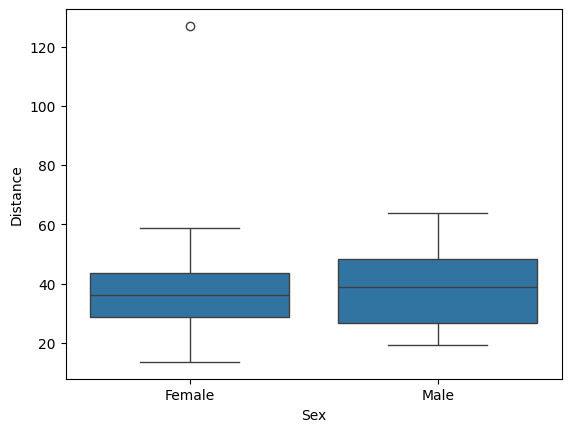

In [8]:
## quick box plotting.
# googled for "python box plot by group"
# https://www.geeksforgeeks.org/grouped-boxplots-in-python-with-seaborn/


import seaborn as sns

# create grouped boxplot
ax = sns.boxplot(y = data['Distance'],
              x = data['Sex'])


Text(0.5, 0, 'Sex')

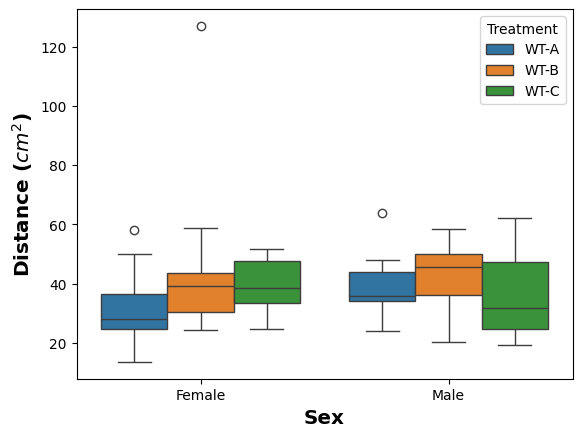

In [9]:
import matplotlib.pyplot as plt

ax = sns.boxplot(y = data['Distance'],
              x = data['Sex'],
              hue = data['Treatment'])

ax.set_ylabel("Distance ($cm^2$)",fontsize='x-large',fontweight='bold') #note this uses a strange $ to get the exponent to display
ax.set_xlabel("Sex",fontsize='x-large',fontweight='bold')

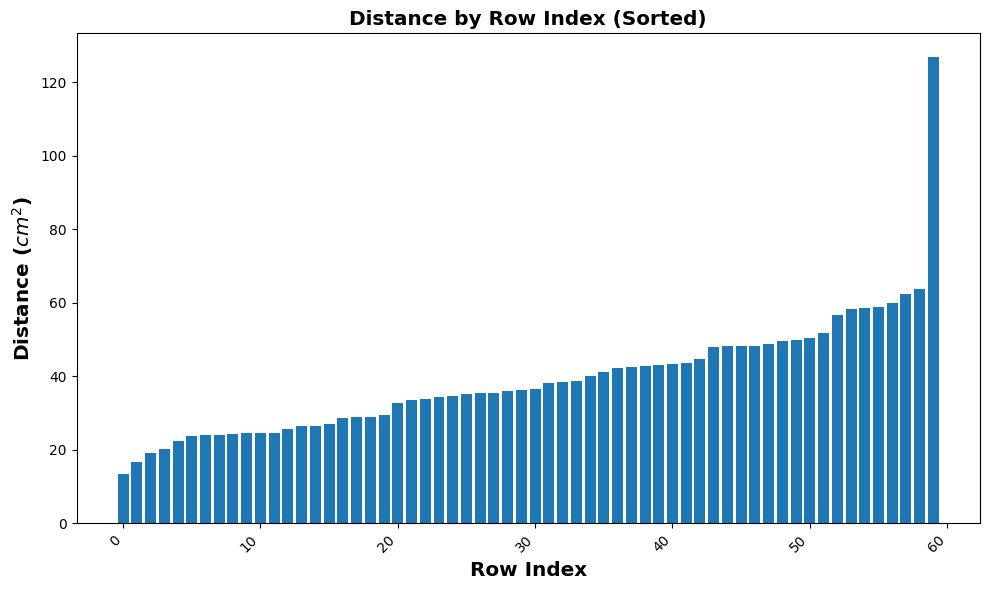

In [10]:
# prompt: plot each row as a bar for distance; sorted by distance; add new row index

# Sort the DataFrame by 'Distance' column
data_sorted = data.sort_values('Distance')

# Reset the index to create a new row index
data_sorted = data_sorted.reset_index(drop=True)

# Create a bar plot for each row
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Bar plot with new row index on x-axis and 'Distance' on y-axis
plt.bar(data_sorted.index, data_sorted['Distance'])

plt.xlabel('Row Index', fontsize='x-large', fontweight='bold')
plt.ylabel('Distance ($cm^2$)', fontsize='x-large', fontweight='bold')
plt.title('Distance by Row Index (Sorted)', fontsize='x-large', fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Treatment')

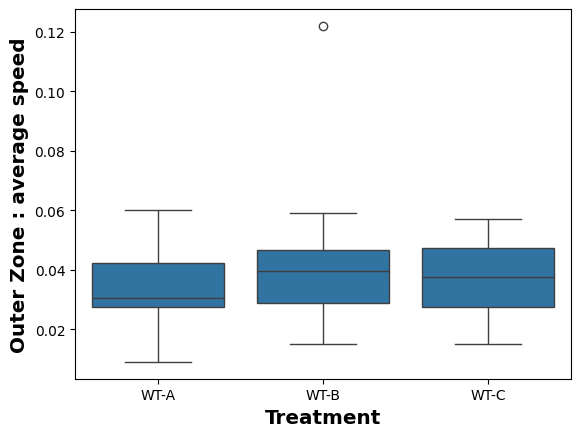

In [12]:
# prompt: plot data by treatment for outer zone time

# create grouped boxplot
ax = sns.boxplot(y = data['Outer Zone : average speed'],
              x = data['Treatment'])

ax.set_ylabel("Outer Zone : average speed",fontsize='x-large',fontweight='bold') #note this uses a strange $ to get the exponent to display
ax.set_xlabel("Treatment",fontsize='x-large',fontweight='bold')
